In [104]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [72]:
books = pd.read_csv('data/books.csv', error_bad_lines=False)
books.rename(columns = {'# num_pages': 'pages'}, inplace=True)
books

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


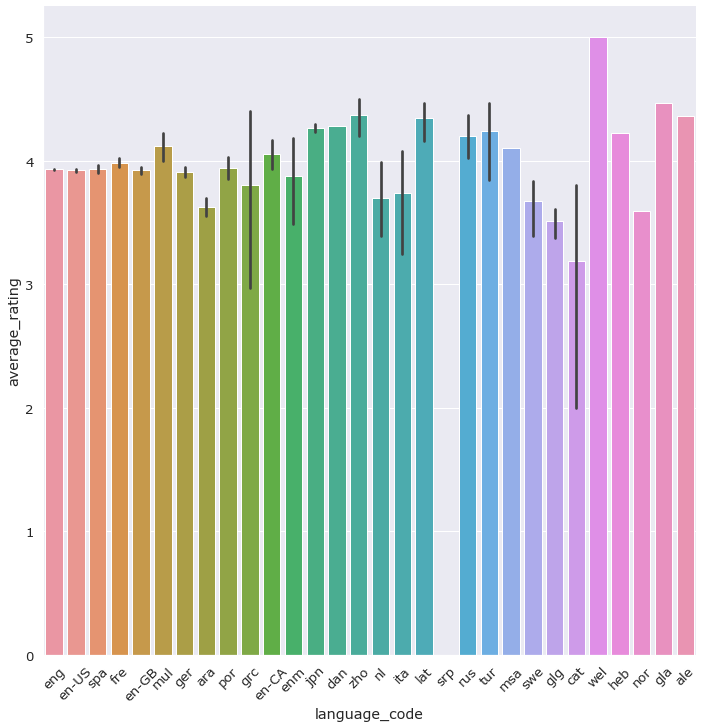

In [102]:
sns.set(font_scale=1.2, font='Verdana')
fig = sns.catplot(x = 'language_code', y = 'average_rating', height = 10, 
            kind='bar', data = books)
fig.set_xticklabels(rotation=45);

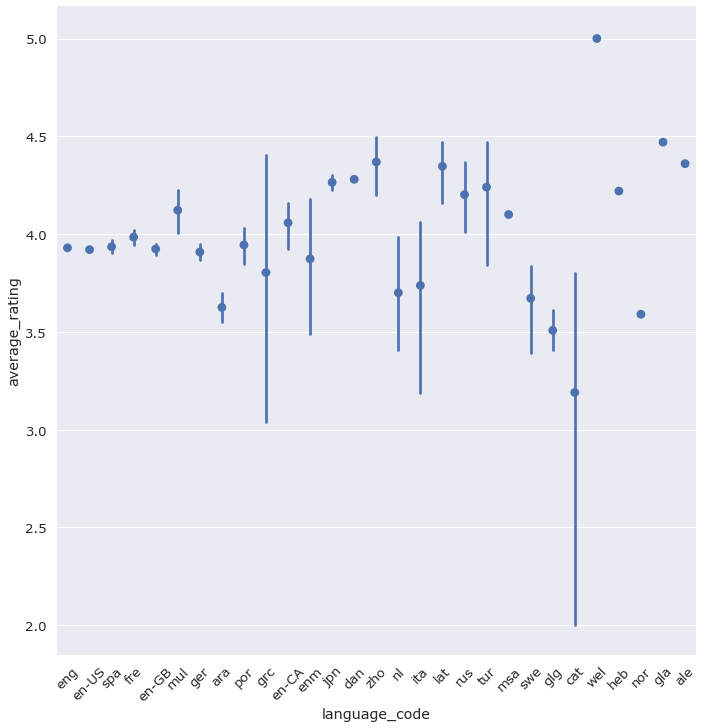

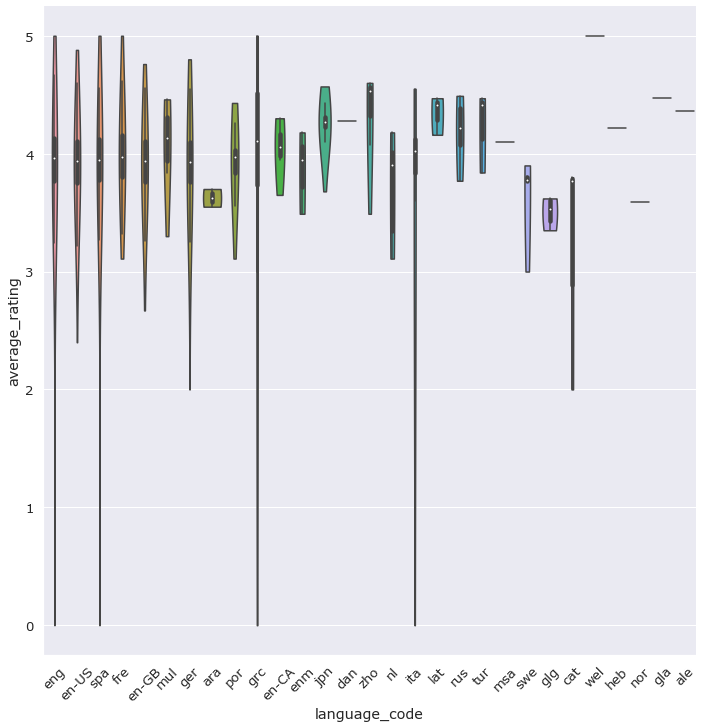

In [115]:
no_srp = books.drop(books[books.language_code == 'srp'].index)
sns.set(font_scale=1.2, font='Verdana')
fig = sns.catplot(x = 'language_code', y = 'average_rating',
                  height = 10, kind='point', data = no_srp, join=False)
fig.set_xticklabels(rotation=45)
fig2 = sns.catplot(x = 'language_code', y = 'average_rating',
                  height = 10, kind='violin', data = no_srp, bw=2, cut=0)
fig2.set_xticklabels(rotation=45);

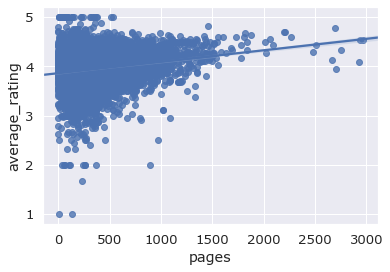

In [107]:
rated = books.drop(books[(books.average_rating == 0) | (books.pages > 3000)].index)
sns.regplot(y = 'average_rating', x = 'pages', data = rated)
plt.show()

Changing datasets here

In [168]:
heart = pd.read_csv('data/heart.csv')
heart.loc[heart.sex == 1, 'sex'] = 'male'
heart.loc[heart.sex == 0, 'sex'] = 'female'
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


''

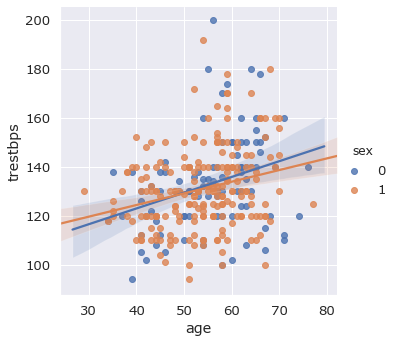

In [126]:
ax = sns.lmplot(x = 'age', y = 'trestbps', data = heart, hue='sex')

;

relplot(kind = 'line') plots the mean and 95% confidence interval at each x value. Potentially more useful to show a linear relationship in murky data.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


''

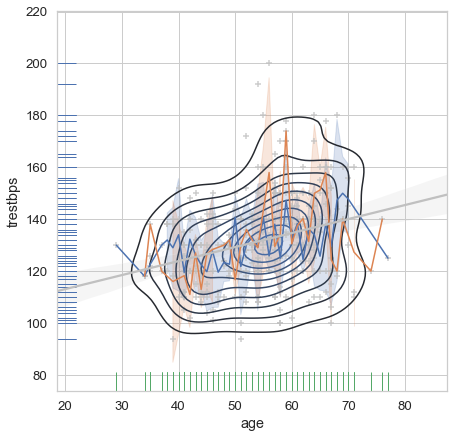

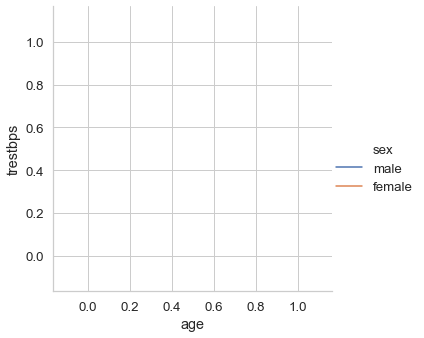

In [208]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (7, 7))
    sns.relplot(x = 'age', y = 'trestbps', data = heart, kind = 'line', hue = 'sex', ci='sd', ax=ax)
    sns.kdeplot(heart.age, heart.trestbps, ax = ax, marker='+')
    sns.rugplot(heart.age, color="g", ax=ax)
    sns.rugplot(heart.trestbps, vertical=True, ax=ax)
    sns.regplot(x = 'age', y = 'trestbps', data = heart, color="silver", marker="+", ax=ax)
;

''

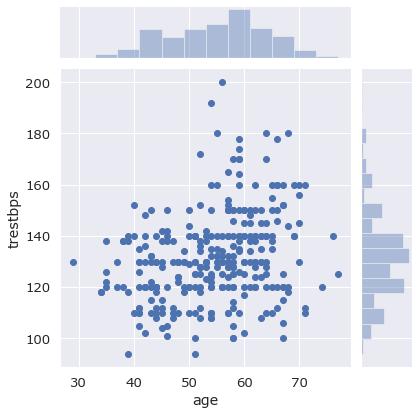

In [130]:
ax = sns.jointplot(x = 'age', y = 'trestbps', data = heart)

;

''

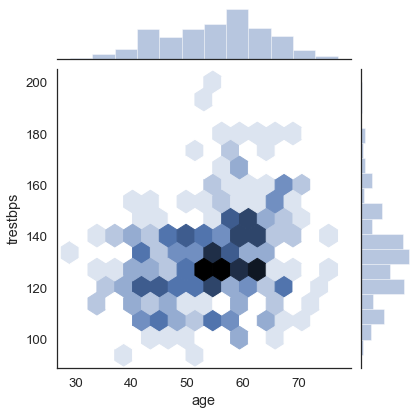

In [131]:
with sns.axes_style('white'):
    ax = sns.jointplot(x = 'age', y = 'trestbps', data = heart, kind = 'hex')

;

''

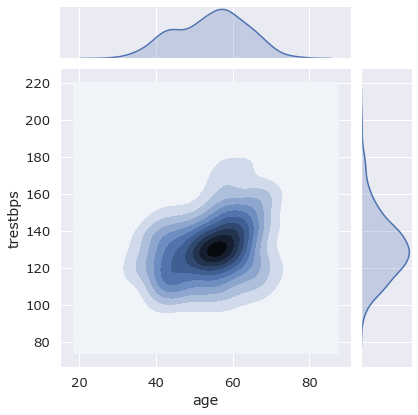

In [132]:
ax = sns.jointplot(x = 'age', y = 'trestbps', data = heart, kind = 'kde')

;

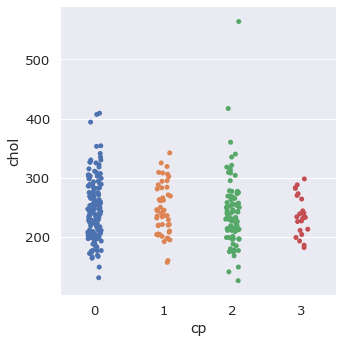

In [177]:
sns.catplot(x = 'cp', y = 'chol', data = heart);

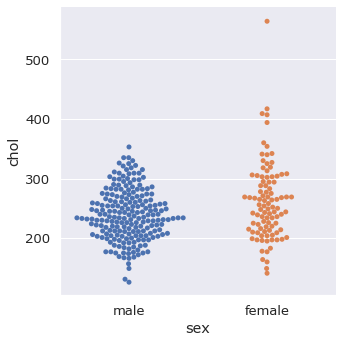

In [179]:
sns.catplot(x = 'sex', y = 'chol', kind = 'swarm', data = heart);

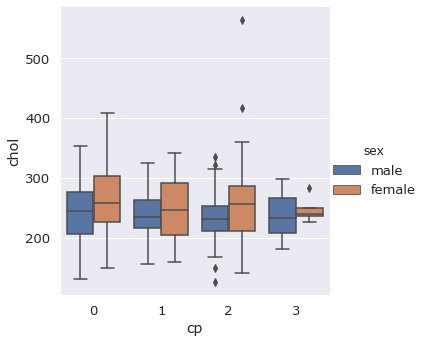

In [180]:
sns.catplot(x = 'cp', y = 'chol', hue = 'sex', kind = 'box', data = heart);

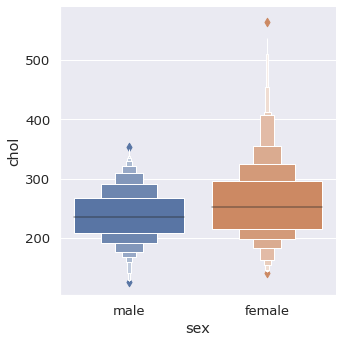

In [173]:
sns.catplot(x = 'sex', y = 'chol', kind = 'boxen', data = heart);

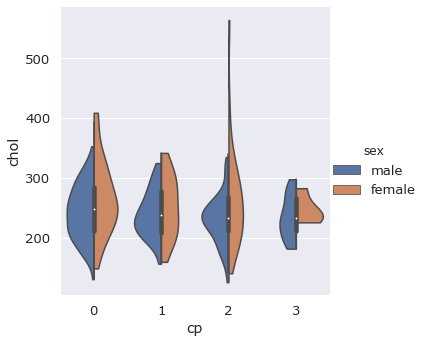

In [184]:
sns.catplot(x = 'cp', y = 'chol', data = heart, kind = 'violin',
            cut = 0, hue = 'sex', split = True);

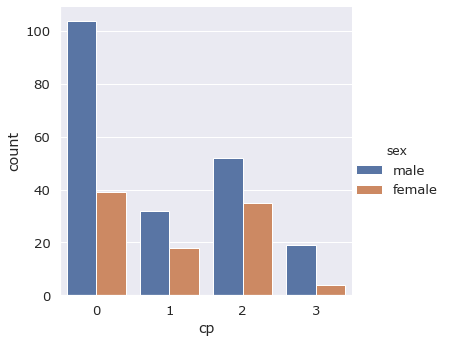

In [185]:
sns.catplot(x = 'cp', kind = 'count', hue = 'sex', data = heart);

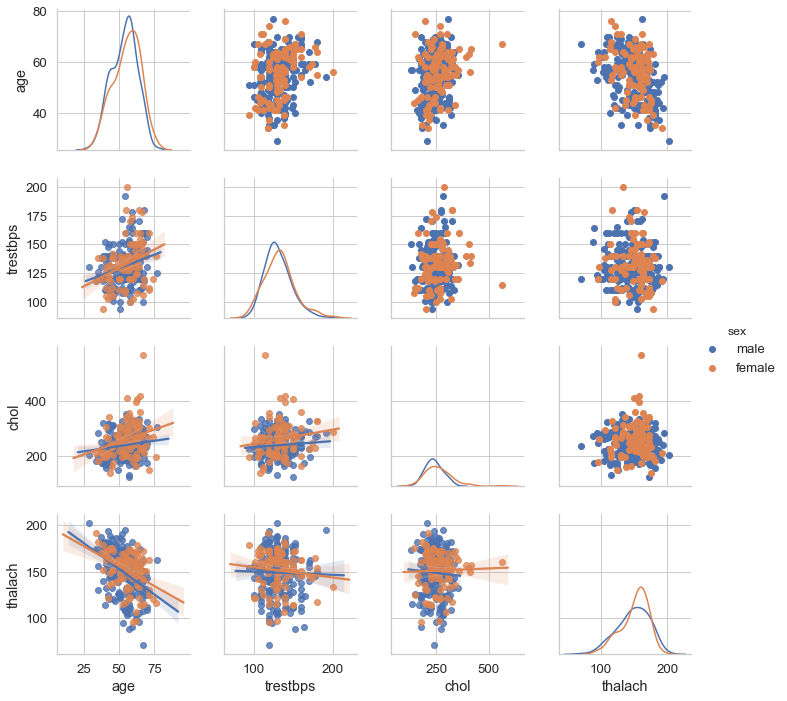

In [205]:
with sns.axes_style('whitegrid'):
    g = sns.PairGrid(heart, vars = [
        'age','trestbps', 'chol', 'thalach'], hue = 'sex')
    g.map_lower(sns.regplot)
    g.map_diag(sns.kdeplot)
    g.map_upper(plt.scatter)
    g.add_legend();